In [1]:
%matplotlib inline

# Summary

The point of this notebook, at the moment, is to test the robustness of MAD as a tree rooting algorithm against tree imbalance. I accomplish this by pruning leaves from one side of the known root node bifurcation and test the statbility of the MAD method

In [14]:
from Bio import Phylo,SeqIO
import ete3

In [5]:
tree = Phylo.read('../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0725.faa.aln.nwk', 'newick')
# tree = Phylo.read('../Tria_et_al_data/eukaryotes/ingroup/mrbayes/KOG0725.faa.aln.nwk', 'newick', rooted=False)
# tree = Phylo.read('../Tria_et_al_data/eukaryotes/outgroup/phyml/KOG0725.faa.aln.nwk', 'newick')
print(len(tree.get_terminals()), len(tree.get_nonterminals()))
print(tree.get_terminals())

31 29
[Clade(branch_length=0.39997, name='7165'), Clade(branch_length=0.22209, name='121225'), Clade(branch_length=0.31391, name='7227'), Clade(branch_length=1.4545, name='6239'), Clade(branch_length=1.4797, name='7668'), Clade(branch_length=0.17959, name='7955'), Clade(branch_length=0.1081, name='8090'), Clade(branch_length=0.04264, name='8128'), Clade(branch_length=0.58316, name='8364'), Clade(branch_length=0.046878, name='9606'), Clade(branch_length=0.20971, name='10090'), Clade(branch_length=0.091113, name='30611'), Clade(branch_length=0.36682, name='4950'), Clade(branch_length=0.34936, name='284590'), Clade(branch_length=0.3, name='381046'), Clade(branch_length=0.25855, name='284593'), Clade(branch_length=0.27428, name='5507'), Clade(branch_length=0.27887, name='318829'), Clade(branch_length=0.18573, name='515849'), Clade(branch_length=0.045514, name='771870'), Clade(branch_length=0.018746, name='5141'), Clade(branch_length=0.20596, name='441959'), Clade(branch_length=0.1093, name

# Get some dictionaries to map the ID's correctly

In [6]:
id_species_dict = {}
with open('../Tria_et_al_data/eukaryotes/ID_to_Species.txt', 'r') as infile:
    texty = infile.readlines()
    for line in texty[1:]:
        sl = line.split('\t')
        id_species_dict[sl[0]] = sl[1]
print(len(id_species_dict.keys()))

41


In [7]:
species_seqid_dict = {}
with open('../Tria_et_al_data/eukaryotes/cluster_to_seqid.txt', 'r') as infile:
    texty = infile.readlines()
    for line in texty:
        sl = line.split('\t')
        if sl[0] == 'KOG0725':
            species_seqid_dict[sl[1]] = sl[2].strip()
print(len(species_seqid_dict.keys()))

41


In [8]:
all_alns_dict = {}
all_alns = list(SeqIO.parse('../KOG0725.txt', 'fasta'))
for aln in all_alns:
    tax = aln.description.split('.')[0]
    others = '.'.join(aln.description.split('.')[1:])
    all_alns_dict[others] = aln
    if aln.description.split('.')[0] == '6239':
        print(aln.description)

6239.C01G12.5
6239.C06B8.3
6239.C06E4.3
6239.C06E4.4
6239.C17G10.8.2
6239.C45B11.3.1
6239.D1054.8
6239.F02C12.2
6239.F12E12.11
6239.F12E12.12
6239.F25D1.5
6239.F26D2.15
6239.F28H7.2
6239.F36H9.3
6239.F53C11.3
6239.F54F3.4
6239.F59E11.2
6239.R05D8.10
6239.R05D8.7
6239.R05D8.8
6239.R05D8.9
6239.R08H2.1.1
6239.R119.3.2
6239.T01G6.1
6239.T01G6.10
6239.T05C12.3
6239.W01C9.4
6239.W03F9.9
6239.Y32H12A.3.2
6239.Y47G6A.21.1
6239.Y47G6A.22.2
6239.Y47G6A.4
6239.Y59A8A.3.1
6239.ZK816.5


In [9]:
all_alns[0]

SeqRecord(seq=Seq('AFAKEGAKVIATDINEAKLQELEKYPXXXXXXXXXXXXXXXXXXXXXXXXXXXX...WSL', SingleLetterAlphabet()), id='10020.ENSDORP00000002122', name='10020.ENSDORP00000002122', description='10020.ENSDORP00000002122', dbxrefs=[])

# Making sure I have the proper information about all tree members

In [12]:
for leaf in tree.get_terminals():
    print('#####')
    print(leaf.name)
    print(id_species_dict[leaf.name])
    print(species_seqid_dict[leaf.name])
#     print(all_alns_dict[species_seqid_dict[leaf.name]].seq)

#####
7165
Anopheles_gambiae
AGAP002521-PA
#####
121225
Pediculus_humanus
PHUM411900-PA
#####
7227
Drosophila_melanogaster
FBpp0078357
#####
6239
Caenorhabditis_elegans
F53C11.3
#####
7668
Strongylocentrotus_purpuratus
SPU_016826tr
#####
7955
Danio_rerio
ENSDARP00000066557
#####
8090
Oryzias_latipes
ENSORLP00000009413
#####
8128
Oreochromis_niloticus
ENSONIP00000025194
#####
8364
Xenopus_(Silurana)_tropicalis
ENSXETP00000022727
#####
9606
Homo_sapiens
ENSP00000219481
#####
10090
Mus_musculus
ENSMUSP00000045621
#####
30611
Otolemur_garnettii
ENSOGAP00000001446
#####
4950
Torulaspora_delbrueckii
XP_003678632.1
#####
284590
Kluyveromyces_lactis_NRRL_Y_1140
XP_453899.1
#####
381046
Lachancea_thermotolerans
XP_002552120.1
#####
284593
Candida_glabrata_CBS_138
XP_447149.1
#####
5507
Fusarium_oxysporum
FOXG_00645P0
#####
318829
Magnaporthe_oryzae
MGG_05138T0
#####
515849
Podospora_anserina_S_mat
XP_001903436.1
#####
771870
Sordaria_macrospora_k_hell
XP_003349725.1
#####
5141
Neurospora_crassa

# Reading/writing trees

I noticed that MAD fails when I load in a Phylo object, and directly write it to a file. So I'm switching to ete3 for the same purpose

In [25]:
###Using Phylo
# tree = Phylo.read('../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0725.faa.aln.nwk', 'newick')
# Phylo.write(tree, '../test.phylo.newick', 'newick')
# to_remove = ['30611', '10090',  '8364', '8128', '8090', '7227', '7165', '7425'] 
# for node in to_remove:
#     print(len(tree.get_terminals()))
#     tree.prune(node)
# Phylo.write(tree, '../test.phylo.minus.newick', 'newick')

In [30]:
###Using ete3
tree = ete3.Tree('../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0725.faa.aln.nwk')
tree.write(format=1, outfile="../test.ete3.newick")
tree.describe()

Number of leaf nodes:	31
Total number of nodes:	60
Rooted:	No
Most distant node:	13684
Max. distance:	5.019279


ete3 allows a few methods to remove nodes. Actually, removing them is more complicated than creating a subset of tree that contains only the named nodes:

    tree.prune(['30611', '10090', '38090', '8364', '8128', '8090', '7668'])

but for now I'll work the the delete method

**Note: what I want to do is get lists for all the eukaryotes and for all the fungi since this is the "ground truth" root. Next, I would ensure that both groups are monophyletic in the tree (because if not then 'true' root finding would seem impossible. Assuming groups are monophyletic, try removing a random few from each branch to imbalance the tree**

In [31]:
to_remove = ['30611', '10090',  '8364', '8128', '8090', '7227', '7165', '7425'] 
for i in to_remove:
    G = tree.search_nodes(name=i)[0]
    G.delete()
tree.write(format=1, outfile="../test.ete3.minus.newick")

In [32]:
tree.describe()

Number of leaf nodes:	23
Total number of nodes:	45
Rooted:	Yes
Most distant node:	13684
Max. distance:	4.593019


# Offline: run the MAD program on the trees

# Online: test how they did!

Need to come up with a metric / automation method here

[Clade(branch_length=0.211364), Clade(branch_length=1.79814)]


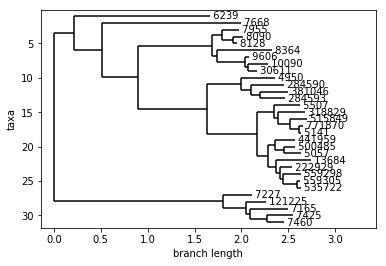

In [33]:
tree = Phylo.read('../test.ete3.newick.rooted', 'newick', rooted=True)
print(tree.root.clades)
Phylo.draw(tree)

[Clade(branch_length=0.18069), Clade(branch_length=0.27564, name='7425'), Clade(branch_length=0.18291, name='7460')]


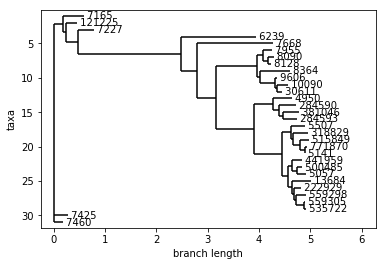

In [40]:
tree = Phylo.read('../test.ete3.newick', 'newick', rooted=True)
# tree = Phylo.read('../test.ete3.minus.newick.rooted', 'newick', rooted=True)
print(tree.root.clades)
Phylo.draw(tree)

In [41]:
for i in tree.get_nonterminals():
    print(len(i.clades))

3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


# Pruning in bulk

    metazoa = ['10090', '121225', '9606', '30611', '8364', '7955', '8128', '8090',\
          '7668', '7460', '7425', '7227', '7165', '6239']

In [54]:
import glob
import random

In [74]:
tree = ete3.Tree('../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0725.faa.aln.nwk')
metazoa = ['10090', '121225', '9606', '30611', '8364', '7955', '8128', '8090',\
          '7668', '7460', '7425', '7227', '7165', '6239']
not_metazoa = [i for i in tree.get_leaf_names() if i not in metazoa]
print(len(metazoa), len(not_metazoa))

14 17


In [80]:
n_to_prune = 15
for infile in glob.glob('../Tria_et_al_data/eukaryotes/ingroup/phyml/*.nwk')[:500]:
    print(infile)
    ###Using ete3
    tree = ete3.Tree(infile)
#     to_remove = random.sample(metazoa, n_to_prune) 
    to_remove = random.sample(not_metazoa, n_to_prune) 
    for i in to_remove:
        G = tree.search_nodes(name=i)[0]
        G.delete()
    tree.write(format=1, outfile=infile+'.{}.pruned'.format(n_to_prune))

../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0436.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0166.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0810.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG2407.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG3745.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG2157.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG2035.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG1879.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0554.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0446.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG1704.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0116.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG3265.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0860.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0902.faa.aln.nwk
../Tria_et_al_data/eukaryotes/ingroup/ph